<a href="https://colab.research.google.com/github/donkalakamakshiharshitha/ML-DL/blob/master/EXERCISE_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
#Importing MNIST dataset
from keras.datasets import mnist
# The np_utils module provides utilities for converting data types and manipulating arrays.
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [153]:
#load_data : unpacks the data into tuples : (X_train, y_train) and (X_test, y_test)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [154]:
print(X_train[1].shape)

(28, 28)


In [155]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [156]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


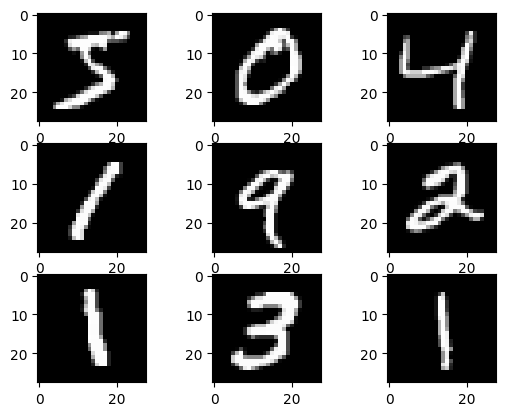

In [157]:
#Visualizing train and test images
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [158]:
#convert 2d to 1d
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [159]:
#shape
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [160]:
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [161]:
#pixel scaling
X_train = X_train/255
X_test = X_test/255

In [162]:
print(X_train[0])


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [173]:
#pre-processing
print("Class label of first image :", y_train[0])

Class label of first image : 5


In [164]:
#One-hot encoding
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [165]:
print("After converting the output into a vector : ",Y_train[0])


After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [166]:
#Building a basic Model
from keras.models import Sequential
from keras.layers import Dense, Activation


In [167]:
input_dim = X_train.shape[1] #784
output_dim = 10 #0-9


In [168]:
model = Sequential()
model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


In [169]:
#training data and labels
history = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 1.2420 - accuracy: 0.7162 - val_loss: 0.8012 - val_accuracy: 0.8371
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.7083 - accuracy: 0.8425 - val_loss: 0.6047 - val_accuracy: 0.8627
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.5841 - accuracy: 0.8609 - val_loss: 0.5247 - val_accuracy: 0.8730
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.5238 - accuracy: 0.8701 - val_loss: 0.4800 - val_accuracy: 0.8807
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4868 - accuracy: 0.8758 - val_loss: 0.4505 - val_accuracy: 0.8859
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4612 - accuracy: 0.8802 - val_loss: 0.4292 - val_accuracy: 0.8888
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4423 - accuracy: 0.8831 - val_loss: 0.4129 - val_accuracy: 0.8922
Epoch 

In [170]:
#Basic model evaluation
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])


Test score: 0.33594560623168945
Test accuracy: 0.9104999899864197


313/313 [==============================] - 1s 1ms/step
[7.4202189e-04 1.2477834e-06 2.5136475e-04 1.5003972e-01 7.7018206e-04
 7.8974080e-01 2.0779650e-04 4.8760166e-06 5.7930868e-02 3.1115735e-04]
5


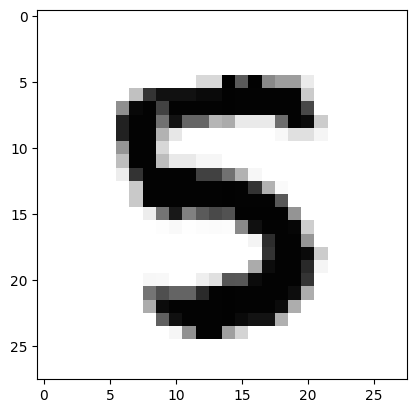

In [171]:
image_index = 120
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test)
print(pred[image_index])
print(np.argmax(pred[image_index]))

In [174]:
#constants for readability
NB_EPOCHS = 20
BATCH_SIZE = 128

In [151]:
# Multilayer perceptron
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))
model_sigmoid.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 512)               401920    
                                                                 
 dense_45 (Dense)            (None, 128)               65664     
                                                                 
 dense_46 (Dense)            (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [175]:
#MLP + Sigmoid activation + ADAM Optimizer
model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_sigmoid.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCHS, verbose=1, validation_data=(X_test, Y_test))


Epoch 1/20
469/469 [==============================] - 7s 13ms/step - loss: 0.5363 - accuracy: 0.8626 - val_loss: 0.2535 - val_accuracy: 0.9281
Epoch 2/20
469/469 [==============================] - 7s 16ms/step - loss: 0.2210 - accuracy: 0.9346 - val_loss: 0.1843 - val_accuracy: 0.9440
Epoch 3/20
469/469 [==============================] - 7s 14ms/step - loss: 0.1628 - accuracy: 0.9517 - val_loss: 0.1438 - val_accuracy: 0.9565
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 0.1255 - accuracy: 0.9625 - val_loss: 0.1159 - val_accuracy: 0.9648
Epoch 5/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0979 - accuracy: 0.9714 - val_loss: 0.0999 - val_accuracy: 0.9683
Epoch 6/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0792 - accuracy: 0.9761 - val_loss: 0.0905 - val_accuracy: 0.9720
Epoch 7/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0644 - accuracy: 0.9811 - val_loss: 0.0826 - val_accuracy: 0.9750

In [145]:
#evaluates the trained neural network model on the testing data (X_test and Y_test)
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])


Test score: 0.335936963558197
Test accuracy: 0.907800018787384


In [147]:
#MLP+ReLu Activation+ADAM optimizer
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,)))
model_relu.add(Dense(128, activation='relu'))
model_relu.add(Dense(output_dim, activation='softmax'))
model_relu.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 512)               401920    
                                                                 
 dense_38 (Dense)            (None, 128)               65664     
                                                                 
 dense_39 (Dense)            (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


313/313 [==============================] - 1s 3ms/step
[0.0249629  0.02629698 0.08240071 0.05394112 0.0549538  0.05910534
 0.06723476 0.46029153 0.03256838 0.13824442]
7


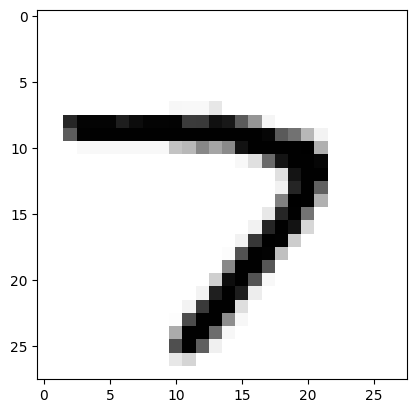

In [189]:
image_index = 70
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model_sigmoid.predict(X_test)
print(pred[image_index])
print(np.argmax(pred[image_index]))


In [176]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_sigmoid.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCHS, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0033 - accuracy: 0.9995 - val_loss: 0.0670 - val_accuracy: 0.9825
Epoch 2/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0023 - accuracy: 0.9996 - val_loss: 0.0654 - val_accuracy: 0.9831
Epoch 3/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0016 - accuracy: 0.9998 - val_loss: 0.0691 - val_accuracy: 0.9831
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.0724 - val_accuracy: 0.9822
Epoch 5/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0071 - accuracy: 0.9975 - val_loss: 0.0822 - val_accuracy: 0.9799
Epoch 6/20
469/469 [==============================] - 6s 14ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0707 - val_accuracy: 0.9835
Epoch 7/20
469/469 [==============================] - 7s 16ms/step - loss: 4.4049e-04 - accuracy: 1.0000 - val_loss: 0.0699 - val_accuracy: 0.

313/313 [==============================] - 1s 3ms/step
[1.1385234e-11 9.9999219e-01 4.8568683e-07 1.5694364e-06 6.2218867e-08
 7.6923108e-09 5.8366993e-08 5.3101403e-06 1.7748556e-07 5.9049484e-08]
1


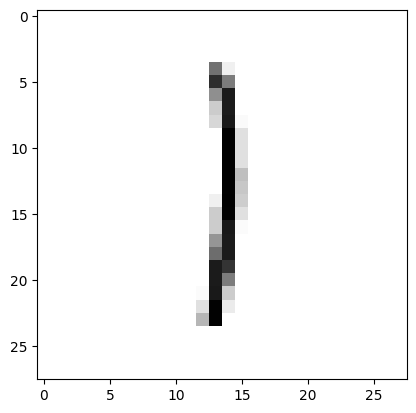

In [148]:
image_index = 40
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model_sigmoid.predict(X_test)
print(pred[image_index])
print(np.argmax(pred[image_index]))

In [ ]:
strategy = tf.distribute.MirroredStrategy()
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
with strategy.scope():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(16))
  model.add(tf.keras.layers.BatchNormalization(synchronized=True))

model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))
model_sigmoid.summary()

313/313 [==============================] - 1s 3ms/step
[0.0249629  0.02629698 0.08240071 0.05394112 0.0549538  0.05910534
 0.06723476 0.46029153 0.03256838 0.13824442]
7


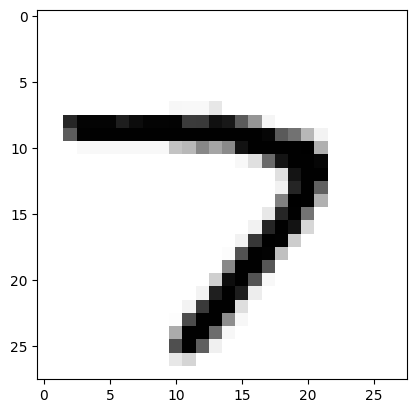

In [181]:
image_index = 70
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model_sigmoid.predict(X_test)
print(pred[image_index])
print(np.argmax(pred[image_index]))